In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.show()

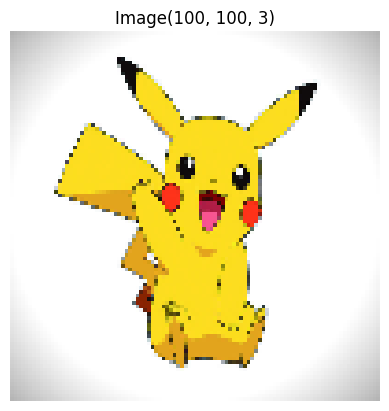

In [3]:
img = cv2.imread('./data/pikachu.jpg')
img = cv2.resize(img,(100,100))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
drawImg(img)

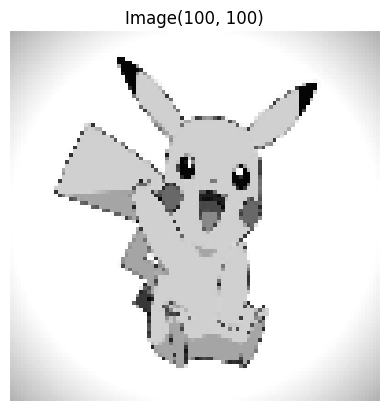

In [4]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img_gray)

In [5]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]

    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col] > 255:
                    new_img[row][col] = 255

                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
            
    return new_img  # Activation Map

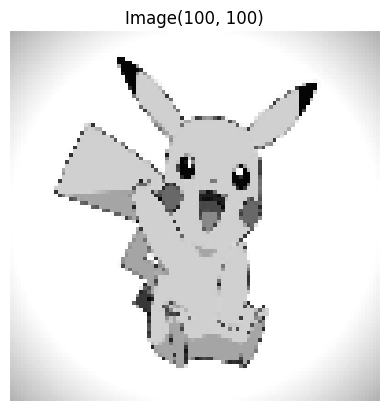

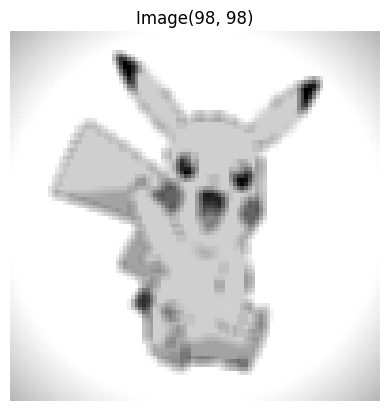

In [6]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)
drawImg(img_gray)
drawImg(output1)

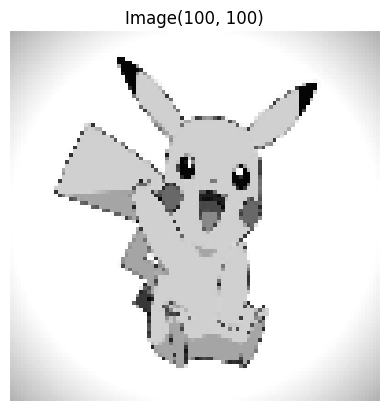

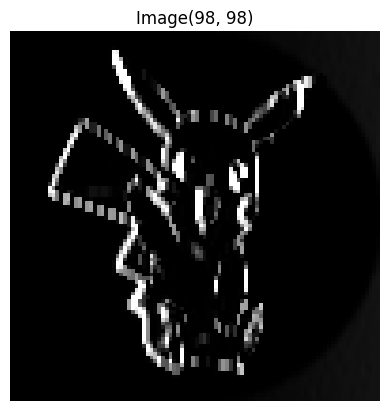

In [7]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

Extracting Features of image using Filters
## Convolution Layer
- contains various filters
- each filter extracts different kinds of features and gives 1 activation map
- multiple activation maps are combined by stacking to form output volume
- so CNN layer takes input a volume

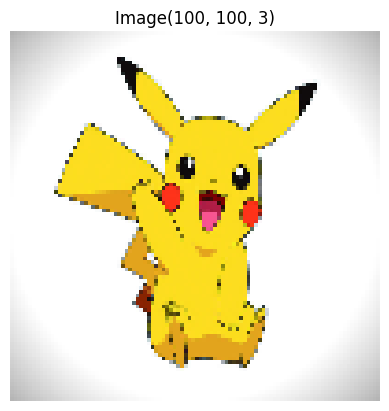

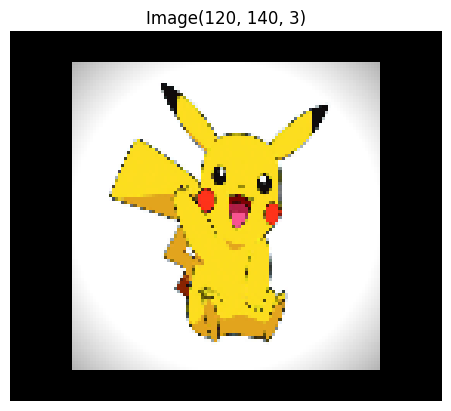

In [9]:
# Padding 
drawImg(img)

# padding to this image
#                       Row     Col                         color
pad_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)
drawImg(pad_img)